# Test Chi-2 zgodności

### Sprawdzanie równoliczności grup

In [155]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy

In [5]:
# Przykład 1

# Badacz chciał sprawdzić, czy w swoim badaniu była równa liczba kobiet i mężczyzn (statystycznie równa, nieistotne statystycznie różnice). 
# W badaniu przebadał 480 mężczyzn oraz 520 kobiet.

alpha = 0.05
data=np.array([480, 520])
T, p = stats.chisquare(data)

print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")

z = stats.chi2(1).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

# Wynik okazał się nieistotny statystycznie (dla p > 0,05). 
# Oznacza to, że badacz może przyjąć, że przebadał podobną liczbę kobiet i mężczyzn (mówiąc językiem statystyki).

Wartość statystyki testowej: 1.6
P-value: 0.20590321073206466
Obszar krytyczny: (3.841458820694124, inf)


### Porównanie występowania obserwacji z ich teoretycznym występowaniem

In [6]:
#Badacz zadał pytanie respondentom czy bardziej im smakuje napój A czy napój B. 36 osób badanych udzieliło odpowiedzi A, a 64 osoby udzieliło odpowiedzi B.

alpha = 0.05
data=np.array([480, 520])
T, p = stats.chisquare(data)

print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")

z = stats.chi2(1).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

# Badacz założył, że gdyby napoje nie różniły się preferencją to powinien uzyskać podobne wyniki w obu grupach, po 50 osób. 
# Przeprowadził test zgodności chi-kwadrat i (dla poziomu p < 0,05) ocenił, że rozkład udzielanych odpowiedzi nie jest równy, przeważa preferencja napoju B.

Wartość statystyki testowej: 1.6
P-value: 0.20590321073206466
Obszar krytyczny: (3.841458820694124, inf)


### Porównanie występowania obserwacji z ich teoretycznym występowaniem

Chi-Square Contingency Test
Zadanie
W przypadku danych z poniższej tabeli sprawdzić czy to, że ktoś jest prawo lub leworęczny zależy od płci:

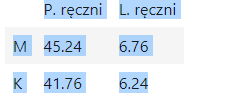


In [3]:
alpha = 0.05
data = np.array([[43,9],[44,4]])
T, p, dof, expected = stats.chi2_contingency(data)
print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")
print(f"Liczba stopni swobody: {dof}")
print(f"Oczekiwane wartości:\n{expected}")
z = stats.chi2(dof).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

Wartość statystyki testowej: 1.0724852071005921
P-value: 0.300384770390566
Liczba stopni swobody: 1
Oczekiwane wartości:
[[45.24  6.76]
 [41.76  6.24]]
Obszar krytyczny: (3.841458820694124, inf)


#### Zadanie
Wykonaj test chi kwadrat w celu sprawdzenia czy dane demograficzne w USA mają ten sam rozkład, co dane w Minesocie. Użyj danych wygenerowanych poniżej:

In [41]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)
national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")
print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)


National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [96]:
data = pd.concat([national_table, minnesota_table], axis = 1)

T, p, dof, expected = stats.chi2_contingency(data)
print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")
print(f"Liczba stopni swobody: {dof}")
print(f"Oczekiwane wartości:\n{expected}")
z = stats.chi2(dof).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

# pval < 0.05 -> odrzucamy hipotezę o tym samym rozkłądzie danych w USA i Minesocie

Wartość statystyki testowej: 18.099524243141698
P-value: 0.0011800326671747886
Liczba stopni swobody: 4
Oczekiwane wartości:
[[1.49956958e+04 7.93041607e+01]
 [4.99856528e+04 2.64347202e+02]
 [5.99827834e+04 3.17216643e+02]
 [3.49650885e+04 1.84911526e+02]
 [1.00070780e+05 5.29220469e+02]]
Obszar krytyczny: (9.487729036781154, inf)


#### Zadanie
Test jednostronny chi-kwadrat
Załóżmy, że wyjeżdżasz wędkować z kolegami. Każdego wieczoru losujecie kto ma sprzątać. Ale po zakończeniu podróży wydaje Ci się, że zrobiłeś większość pracy:

Ty - 10
Piotr - 6
Marek - 5
Michał - 4
Paweł - 3
Rafał - 2

Wykonujemy test

In [98]:
import numpy as np
import pandas as pd
from scipy import stats
data=np.array([10,6,5,4,5,3])

T, p = stats.chisquare(data)

print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")

z = stats.chi2(1).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

Wartość statystyki testowej: 5.363636363636364
P-value: 0.37313038594870584
Obszar krytyczny: (3.841458820694124, inf)


DOKŁADNY TEST FISHERA

Zadanie
W przypadku danych z poniższej tabeli sprawdzić czy to, że ktoś jest prawo lub leworęczny zależy od płci:
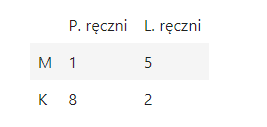

In [14]:
#a = np.array([[1,5],[8,2]])
a = np.array([[1,9],[11,3]])

T, p, dof, expected = stats.chi2_contingency(a)
print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")
print(f"Liczba stopni swobody: {dof}")
print(f"Oczekiwane wartości:\n{expected}")
z = stats.chi2(dof).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

Wartość statystyki testowej: 8.4
P-value: 0.00375221010087385
Liczba stopni swobody: 1
Oczekiwane wartości:
[[5. 5.]
 [7. 7.]]
Obszar krytyczny: (3.841458820694124, inf)


In [28]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(a, alternative='two-sided')
print(f"P-value z testu dokładnego Fishera: {p}")

P-value z testu dokładnego Fishera: 0.0027594561852200836


CZESC SAMODZIELNA

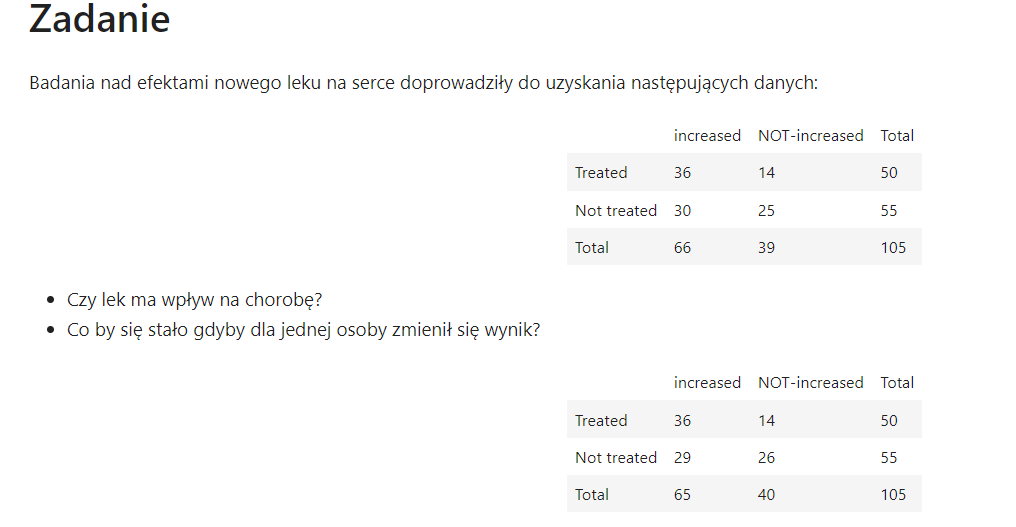

In [31]:
data = np.array([[36,14],[30,25]])

T, p, dof, expected = stats.chi2_contingency(data)
print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")
print(f"Liczba stopni swobody: {dof}")
print(f"Oczekiwane wartości:\n{expected}")
z = stats.chi2(dof).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

Wartość statystyki testowej: 2.710942466624286
P-value: 0.09966209595851808
Liczba stopni swobody: 1
Oczekiwane wartości:
[[31.42857143 18.57142857]
 [34.57142857 20.42857143]]
Obszar krytyczny: (3.841458820694124, inf)


In [30]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(data, alternative='two-sided')
print(f"P-value z testu dokładnego Fishera: {p}")

P-value z testu dokładnego Fishera: 0.07232579715629225


Zadanie
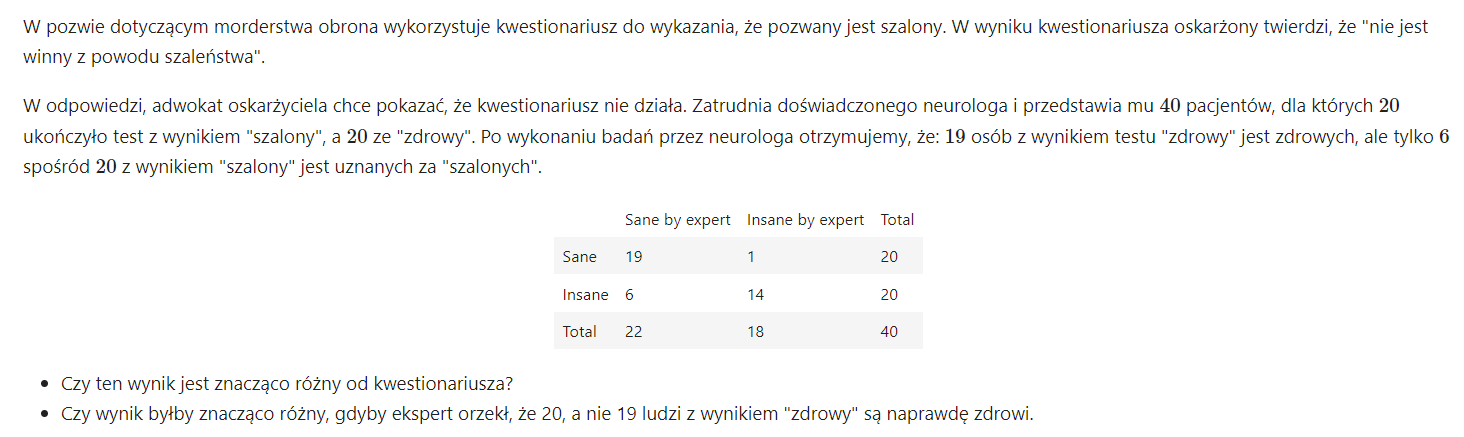

In [32]:
data = np.array([[19,1],[6,14]])

T, p, dof, expected = stats.chi2_contingency(data)
print(f"Wartość statystyki testowej: {T}")
print(f"P-value: {p}")
print(f"Liczba stopni swobody: {dof}")
print(f"Oczekiwane wartości:\n{expected}")
z = stats.chi2(dof).ppf(1 - alpha)
print(f"Obszar krytyczny: {(z, np.Inf)}")

Wartość statystyki testowej: 15.36
P-value: 8.884941911456685e-05
Liczba stopni swobody: 1
Oczekiwane wartości:
[[12.5  7.5]
 [12.5  7.5]]
Obszar krytyczny: (3.841458820694124, inf)


In [33]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(data, alternative='two-sided')
print(f"P-value z testu dokładnego Fishera: {p}")

P-value z testu dokładnego Fishera: 3.9313721182464226e-05


Wykonaj test niezależności chi kwadrat w celu sprawdzenia, czy preferencje wyborcze zależą od czynnika demograficznego. Użyj danych wygenerowanych poniżej:



In [211]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


In [184]:
V, p = stats.chisquare(voter_tab.iloc[:-1,:-1])
print(p)


[8.77824537e-55 3.70755344e-31 5.95393937e-62]


In [220]:
V, p = stats.chisquare(voter_tab["democrat"][:-1], f_exp=list(voter_tab["row_totals"][:-1]/voter_tab["row_totals"][-1]*voter_tab["democrat"][-1]))
print(p)

V, p = stats.chisquare(voter_tab["independent"][:-1], f_exp=list(voter_tab["row_totals"][:-1]/voter_tab["row_totals"][-1]*voter_tab["independent"][-1]))
print(p)

V, p = stats.chisquare(voter_tab["republican"][:-1], f_exp=list(voter_tab["row_totals"][:-1]/voter_tab["row_totals"][-1]*voter_tab["republican"][-1]))
print(p)

0.8318031085834037
0.6429636910188363
0.5266785531049493
